In [1]:
import pandas as pd

# CSVファイルの読み込み
df = pd.read_csv("sample_pandas_6 (1).csv")

# 発注日をdatetime型に変換
df["発注日"] = pd.to_datetime(df["発注日"], errors="coerce")

# 月と季節を抽出
df["月"] = df["発注日"].dt.month
df["季節"] = df["月"].map({12: "冬", 1: "冬", 2: "冬",
                        3: "春", 4: "春", 5: "春",
                        6: "夏", 7: "夏", 8: "夏",
                        9: "秋", 10: "秋", 11: "秋"})

In [2]:
df["売上"] = df["単価"] * df["注文数"]

In [3]:
seasonal_sales = df.groupby("季節")["売上"].sum().sort_values(ascending=False)
print(seasonal_sales)

季節
春    874260
秋    770220
夏    596340
冬    594720
Name: 売上, dtype: int64


In [4]:
pivot_table = pd.pivot_table(df, values="売上", index="商品名", columns="季節", aggfunc="sum", fill_value=0)
print(pivot_table)

季節                    冬       夏       春       秋
商品名                                            
商品サンプル 1QJFO8QY   64800   68400  226800  316800
商品サンプル 2HSTCDWM    7200   79200   54000   36000
商品サンプル 48XMJXKO    9900   11880    9900   39600
商品サンプル 8T7D5DQA   15840   11520   29520    6480
商品サンプル MESUDVWQ   59400  102960  190080  138600
商品サンプル QRMOGNUU  133560  110880   80640   50400
商品サンプル S6RE8W6X  138240  120960  138240   82080
商品サンプル X0ZE2ZMY    9180     540    9180    8640
商品サンプル YY4HAAZR  140400   88920  117000   74880
商品サンプル Z4WOOIYV   16200    1080   18900   16740


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31680 (\N{CJK UNIFIED IDEOGRAPH-7BC0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from font(s) DejaVu Sans.
  fig.canvas

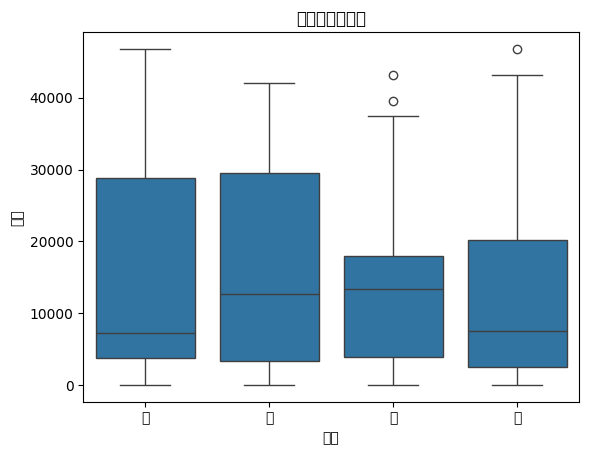

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x="季節", y="売上")
plt.title("季節別売上分布")
plt.show()